In [57]:
import json
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

In [41]:
df_outfit = pd.read_csv('./data/outfits.csv', encoding='utf-8', sep=";")
df_outfit

,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'..."
1,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Yellow Shell Mellomholmene Blouse,This beautiful blouse features an adjustable n...,group.61ad2fcabb3e9197e3836376e6b67f2c,o_00577,2021-06-07 12:07:22.921,1300.0,590.0,1180.0,"['ILAG', 'Tops', 'Spring', 'Summer', 'M', 'Pat...","['Brand', 'Category', 'Seasons', 'Seasons', 'S..."
2,outfit.fff175b13ceb453f9928625491412ede,Kaula Dress Black,Kaula from Rodebjer is a fitted dress made in ...,group.37c2b59d63d3a9c2d58e07f532f71f7f,o_00336,2023-06-05 09:17:59.004,3100.0,930.0,1860.0,"['Black', 'Mini', 'M', 'Everyday', 'Multi Seas...","['Color', 'Length', 'Size', 'Occasion', 'Seaso..."
3,outfit.ffef9d7c292a48b69076d2df2e32352f,For sale - Jarvis Blouse,This wrap blouse has mid length sleeves and a ...,group.dfcaa57546b0b7a5e9eb204449b6cc1c,o_00030,2021-05-18 14:02:28.690,1500.0,590.0,1180.0,"['XS', 'Multi Season', 'Stylein', 'Tops', 'Cot...","['Size', 'Seasons', 'Brand', 'Category', 'Mate..."
4,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Black Amber Pants,"Feel slack and nice dressed with this pant, ma...",group.ee297c977905eb21a123a4aea5fbb6d2,o_00602,2021-07-16 14:02:30.643,1200.0,590.0,1180.0,"['Cotton', 'Black', 'Everyday', 'Knitwear', 'L...","['Material', 'Color', 'Occasion', 'Category', ..."
...,...,...,...,...,...,...,...,...,...,...,...
15644,outfit.001bf665330140cf854dcfb1cbff6b5f,Out of stock - Harley Vintage White Midi Dress,This gorgeous dress is cut in the most flatter...,group.d91a2a6728833c8082dadf27b95488a9,o_00226,2019-06-25 10:13:55.000,3800.0,800.0,1600.0,"['Formal', 'White', 'Midi', 'Pia Tjelta', 'Dre...","['Occasion', 'Color', 'Length', 'Brand', 'Cate..."
15645,outfit.0018701ce6b049ebadc314d16623caa8,Vintage Burberry Trench Coat,You really can't go wrong with this Classic Tr...,group.6be510229d0f9faf5d19d52e7e2b2a95,o_00430,2023-02-07 07:54:06.214,22000.0,890.0,1780.0,"['Winter', 'Cotton', 'S', 'Midi', 'Beige', 'Co...","['Seasons', 'Material', 'Size', 'Length', 'Col..."
15646,outfit.0014a5c89b244077a3d7cffd4549718e,Mira Skirt Brown,The Mira Skirt in Brown from Stine Goya is an ...,group.668be5db7976aa2cb9213dd4c7f9b7fe,o_00052,2023-10-09 09:12:14.631,1500.0,590.0,1180.0,"['S', 'Spring', 'Pattern', 'Women', 'Viscose',...","['Size', 'Seasons', 'Details', 'Gender', 'Mate..."
15647,outfit.0013691ff35b440e9dcfe1748ec184c7,Oldina Parka Cotta,The Oldina Parka from Kari Traa is a women's p...,group.c82046bcba672c8ec9b21be4f844b402,o_00067,2023-02-23 12:20:27.042,3500.0,990.0,1980.0,"['Kari Traa', 'XS', 'Women', 'Everyday', 'Midi...","['Brand', 'Size', 'Gender', 'Occasion', 'Lengt..."


In [42]:
df_names = pd.read_csv('./data/picture_triplets.csv', encoding='utf-8', sep=";")
df_names

,picture.id,outfit.id,displayOrder,file_name
0,picture.0000cdba64314d84a49ed1c266589cc0,outfit.794483397da8425a813301eecf9828c6,0,0000cdba64314d84a49ed1c266589cc0.jpg
1,picture.00058abb53434872ae9bb4270ae21f8e,outfit.98f32aaf08bc4ff09c44e6e11e9199bc,2,00058abb53434872ae9bb4270ae21f8e.jpg
2,picture.00063f52c36d43ada95da45f819b30b4,outfit.9fd1c42c3db543c5b6e53b0db1ee8c0f,3,00063f52c36d43ada95da45f819b30b4.jpg
3,picture.0008443461814f5c988f123718bbd20e,outfit.a7539783b6e94591bdf4e10339afc1d7,3,0008443461814f5c988f123718bbd20e.jpg
4,picture.000a5db3362049aebcc1eb2bf7bde95f,outfit.745fa2bc8156478bac6c0f7d46dadbda,1,000a5db3362049aebcc1eb2bf7bde95f.jpg
...,...,...,...,...
50188,picture.fffa8417a83642e0aba3c8187e80a3b9,outfit.225b573681f9446a8b5dc126add381b8,2,fffa8417a83642e0aba3c8187e80a3b9.jpg
50189,picture.fffb74fce5fe45a38a044d615aa2a24d,outfit.31c9f26da9dc4db99d3c4bbedf1684ea,4,fffb74fce5fe45a38a044d615aa2a24d.jpg
50190,picture.fffc775422274fd7937563d5cb872bf5,outfit.6f1c819d6eff430f9205e034b8cbafc4,3,fffc775422274fd7937563d5cb872bf5.jpg
50191,picture.fffd49c19adb41eca997f2446c809ba0,outfit.8683d74742d24a1fa0078771b0c8e469,3,fffd49c19adb41eca997f2446c809ba0.jpg


In [43]:
df = pd.merge(df_outfit, df_names, left_on="id", right_on="outfit.id", how="inner").drop(columns=["outfit.id"])
df

,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories,picture.id,displayOrder,file_name
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'...",picture.1b9e3cf3581d4205890c52f4eac29cd1,0,1b9e3cf3581d4205890c52f4eac29cd1.jpg
1,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'...",picture.4d6f95d3f283451492d0c17b24e557e2,0,4d6f95d3f283451492d0c17b24e557e2.jpg
2,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'...",picture.8a8e1c4096ad46619d4781cf754b7a27,0,8a8e1c4096ad46619d4781cf754b7a27.jpg
3,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'...",picture.c5fbf81e1d4c40babef6d89e3fbcefd1,0,c5fbf81e1d4c40babef6d89e3fbcefd1.jpg
4,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'...",picture.c684d164310c4f11b0e8341ba2687ab1,0,c684d164310c4f11b0e8341ba2687ab1.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50188,outfit.0013691ff35b440e9dcfe1748ec184c7,Oldina Parka Cotta,The Oldina Parka from Kari Traa is a women's p...,group.c82046bcba672c8ec9b21be4f844b402,o_00067,2023-02-23 12:20:27.042,3500.0,990.0,1980.0,"['Kari Traa', 'XS', 'Women', 'Everyday', 'Midi...","['Brand', 'Size', 'Gender', 'Occasion', 'Lengt...",picture.4d000a034f7c441b9be923450d7263d2,2,4d000a034f7c441b9be923450d7263d2.jpg
50189,outfit.0013691ff35b440e9dcfe1748ec184c7,Oldina Parka Cotta,The Oldina Parka from Kari Traa is a women's p...,group.c82046bcba672c8ec9b21be4f844b402,o_00067,2023-02-23 12:20:27.042,3500.0,990.0,1980.0,"['Kari Traa', 'XS', 'Women', 'Everyday', 'Midi...","['Brand', 'Size', 'Gender', 'Occasion', 'Lengt...",picture.5154c9ffde1441908749ee9c6a6fddc6,4,5154c9ffde1441908749ee9c6a6fddc6.jpg
50190,outfit.0013691ff35b440e9dcfe1748ec184c7,Oldina Parka Cotta,The Oldina Parka from Kari Traa is a women's p...,group.c82046bcba672c8ec9b21be4f844b402,o_00067,2023-02-23 12:20:27.042,3500.0,990.0,1980.0,"['Kari Traa', 'XS', 'Women', 'Everyday', 'Midi...","['Brand', 'Size', 'Gender', 'Occasion', 'Lengt...",picture.9c821ecbecb14c959f35078010fb91f3,1,9c821ecbecb14c959f35078010fb91f3.jpg
50191,outfit.00004b4d01ca4ab0a70cf073ba74fefa,Yugen Black Cardigan,The FWSS Yugen Cardigan is a form-fitted cardi...,group.4002da292009a8bb0d403bbaf734184e,o_00463,2022-03-01 10:58:12.456,1900.0,590.0,1180.0,"['Winter', 'Everyday', 'Fall', 'FWSS', 'Wool',...","['Seasons', 'Occasion', 'Seasons', 'Brand', 'M...",picture.a2b794c7ef83495a8997e7b0c318d65a,1,a2b794c7ef83495a8997e7b0c318d65a.jpg


In [44]:
data_tags = {}
for i, row in df.iterrows():
    id = row["file_name"]
    outfit_tags = json.loads(row["outfit_tags"].replace("'", '"'))
    tag_categories = json.loads(row["tag_categories"].replace("'", '"'))
    data_tags[id] = {}
    for tag, category in zip(outfit_tags, tag_categories):
        data_tags[id][category] = tag
        
df_tags = pd.DataFrame.from_dict(data_tags, orient='index')
df_tags

,Material,Occasion,Category,Details,Length,Size,Color,Brand,Seasons,Gender,Fit
1b9e3cf3581d4205890c52f4eac29cd1.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
4d6f95d3f283451492d0c17b24e557e2.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
8a8e1c4096ad46619d4781cf754b7a27.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
c5fbf81e1d4c40babef6d89e3fbcefd1.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
c684d164310c4f11b0e8341ba2687ab1.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
c6cde03739ec480caf5764550b198ccf.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi Season,Women,NaN
81e5af7fad8b3128.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi Season,Women,NaN
9f146078291a4505980ece3d851d0758.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women,NaN
bd3e6b6524664e56bb0815b3578a1dc9.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women,NaN


In [45]:
df_tags.dropna(subset=["Color", "Category", "Details"])

,Material,Occasion,Category,Details,Length,Size,Color,Brand,Seasons,Gender,Fit
1b9e3cf3581d4205890c52f4eac29cd1.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
4d6f95d3f283451492d0c17b24e557e2.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
8a8e1c4096ad46619d4781cf754b7a27.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
c5fbf81e1d4c40babef6d89e3fbcefd1.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
c684d164310c4f11b0e8341ba2687ab1.jpg,Cotton,Statement,Dresses,Metallic,Mini,S,Black,Sandro,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
c14e435b93b24f138552fa5f3ca608cb.jpg,NaN,NaN,Dresses,Checkers,Mini,XS,Gold,Baum und Pferdgarten,Fall,Women,NaN
d3bef50ca75141bcba86ec301ad2013e.jpg,NaN,NaN,Dresses,Checkers,Mini,XS,Gold,Baum und Pferdgarten,Fall,Women,NaN
f25ccfca72604f9bb06251d538f817a8.jpg,NaN,NaN,Dresses,Checkers,Mini,XS,Gold,Baum und Pferdgarten,Fall,Women,NaN
11001260e0e947ca8fc9551c6f104706.jpg,NaN,NaN,Dresses,Sequins,Mini,S,Beige,NaN,NaN,NaN,NaN


In [46]:

df_tags.groupby(["Details"]).size().reset_index(name='counts').sort_values(by="counts", ascending=False)

,Details,counts
3,Floral,5422
5,Pattern,4341
6,Ruffles,2870
8,Stripes,1217
7,Sequins,1203
4,Metallic,883
2,Checkers,717
0,Animal print,444
1,Beaded,306


In [47]:
df_tags.groupby(["Category"]).size().reset_index(name='counts').sort_values(by="counts", ascending=False)

,Category,counts
6,Dresses,22610
16,Tops,3886
17,Trousers,3130
14,Skirts,2950
7,Jackets,2553
10,Knitwear,1815
15,Sweaters,1719
1,Bags,1697
5,Coats,1379
2,Blazers,1359


In [48]:
df_tags.groupby(["Color"]).size().reset_index(name='counts').sort_values(by="counts", ascending=False)

,Color,counts
1,Black,9565
2,Blue,7427
13,White,4976
5,Green,4398
9,Pink,4021
0,Beige,2897
7,Multicolor,2421
11,Red,2231
3,Brown,2015
14,Yellow,2010


./data/images/7d86226f09f040bd81ef18fd24cf4e04.jpg


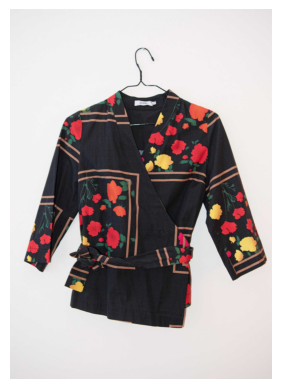

In [60]:
file = df_tags[df_tags["Details"] == "Floral"].iloc[0]
filepath = f"./data/images/{file.name}"
print(filepath)
img = cv.imread(filepath)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()